# TASK 3
# PERFORM EXPLORATORY DATA ANALYSIS
# PRIYANKA SUNIL KIZHEKETHOTTAM
DATASET : SAMPLESUPERSTORE.CSV ()

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
import warnings
warnings.filterwarnings('ignore')

In [327]:
#Read data 
data =pd.read_csv('SampleSuperstore.csv')

In [328]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [329]:
data.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# INFORMATION AND DIMENSIONS

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [331]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [332]:
data.shape

(9994, 13)

In [333]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# CHECK FOR NULL AND DUPLICATE VALUES

In [334]:
data.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [335]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [336]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [337]:
data.duplicated().sum()

17

# DROP DUPLICATES
# POSTAL CODES ARE REPEATED AND THE COUNTRY IS USA

In [338]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [339]:
data.drop_duplicates().sum()

Ship Mode       Second ClassSecond ClassSecond ClassStandard C...
Segment         ConsumerConsumerCorporateConsumerConsumerConsu...
Country         United StatesUnited StatesUnited StatesUnited ...
City            HendersonHendersonLos AngelesFort LauderdaleFo...
State           KentuckyKentuckyCaliforniaFloridaFloridaCalifo...
Postal Code                                             550281077
Region          SouthSouthWestSouthSouthWestWestWestWestWestWe...
Category        FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category    BookcasesChairsLabelsTablesStorageFurnishingsA...
Sales                                                2296195.5903
Quantity                                                    37820
Discount                                                  1559.19
Profit                                                286241.4226
dtype: object

In [340]:
data.drop(['Country', 'Postal Code'], axis = 1)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# GRAPHS AND VISUAL REPRESENTATION

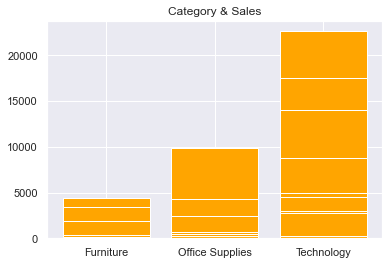

In [341]:
plt.figure()
plt.bar('Category','Sales',data=data,color="orange")
plt.title('Category & Sales')
plt.show()


In [342]:

data['Category'].value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

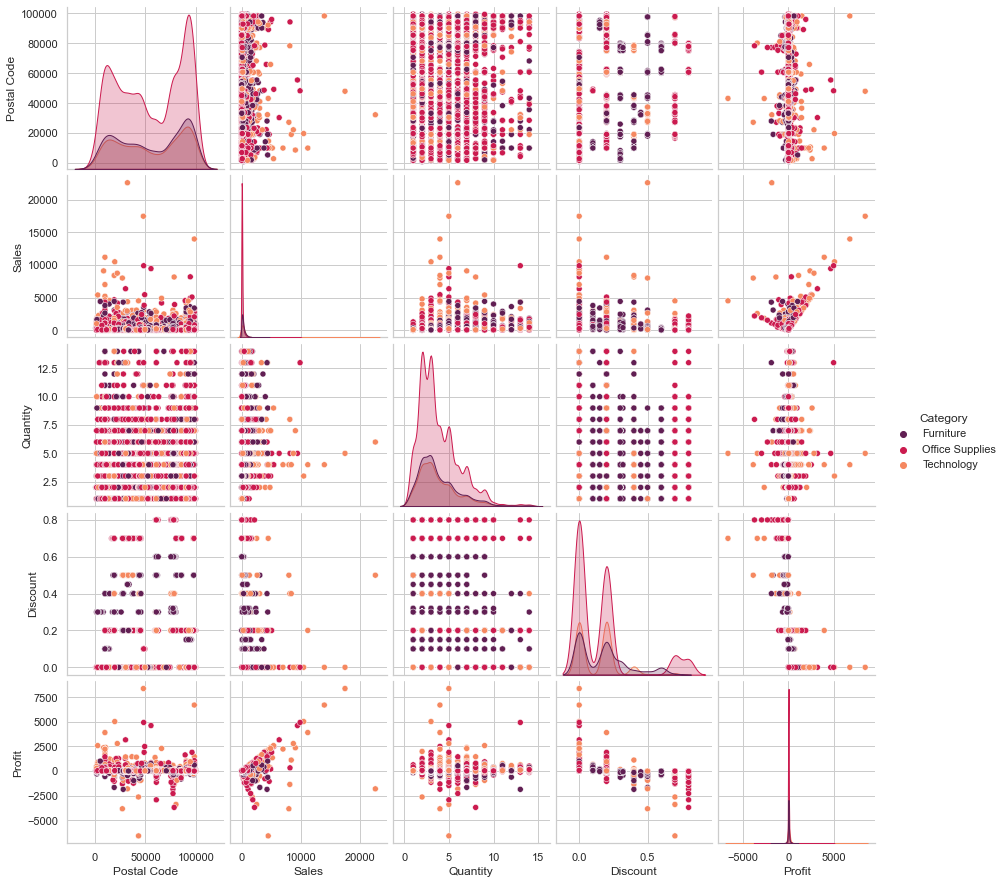

In [374]:
sns.color_palette("rocket", as_cmap=True)
sns.pairplot(data,hue='Category',palette='rocket')

In [344]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

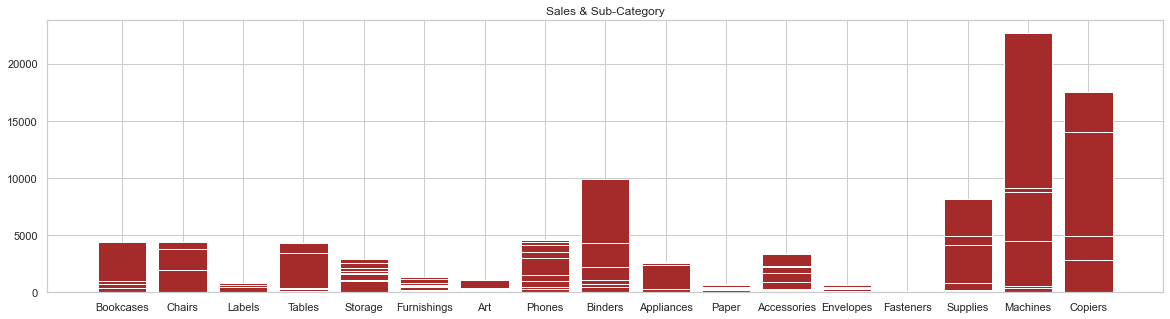

In [372]:
plt.figure(figsize=(20,5))
plt.bar('Sub-Category','Sales',data=data,color="brown")
plt.title('Sales & Sub-Category')
plt.show()

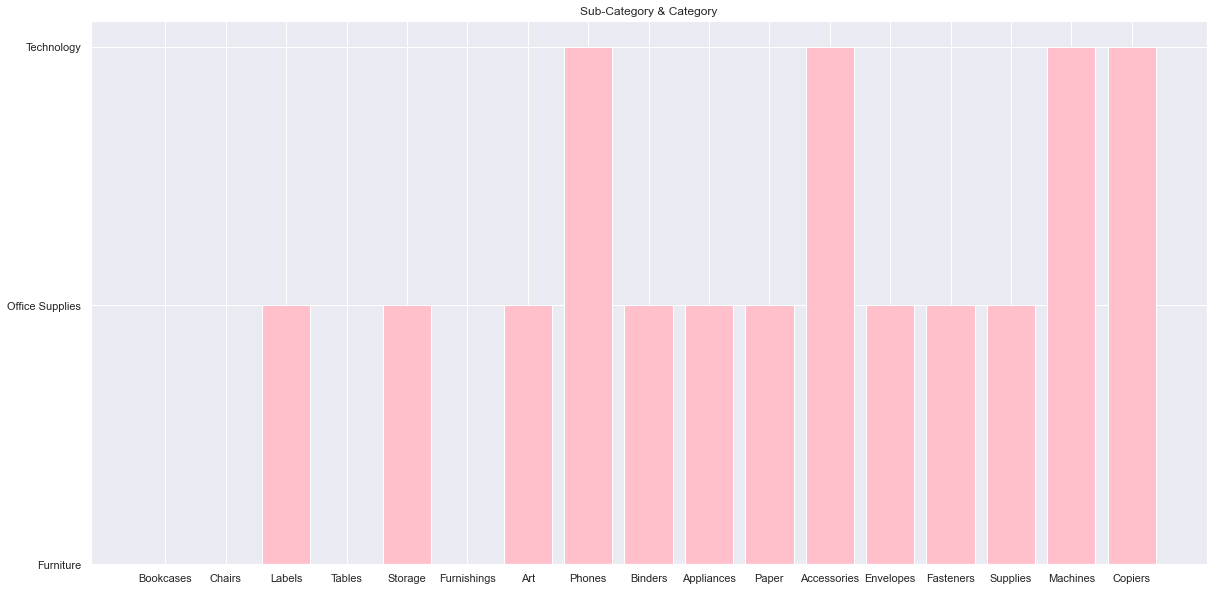

In [346]:
plt.figure(figsize=(20,10))
plt.bar('Sub-Category','Category',data=data,color="pink")
plt.title('Sub-Category & Category')
plt.show()

In [347]:
data1 = data['State'].value_counts()
data1=data1.head(50)

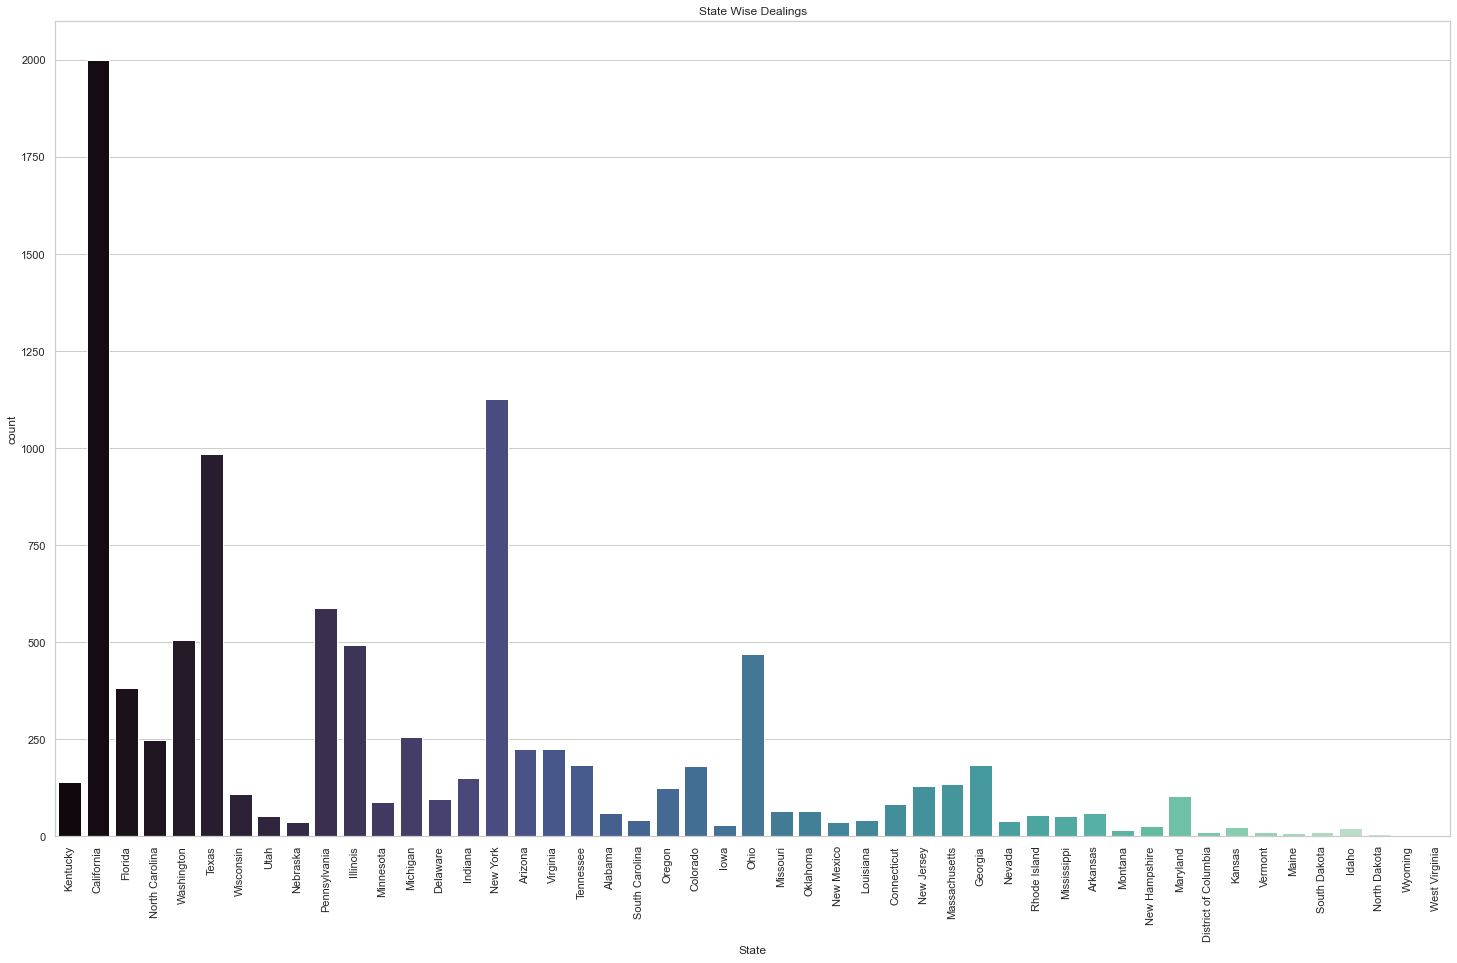

In [375]:
plt.figure(figsize=(25,15))
sns.countplot(x = data['State'],palette='mako')
plt.title('State Wise Dealings')
plt.xticks(rotation=90)
plt.show()

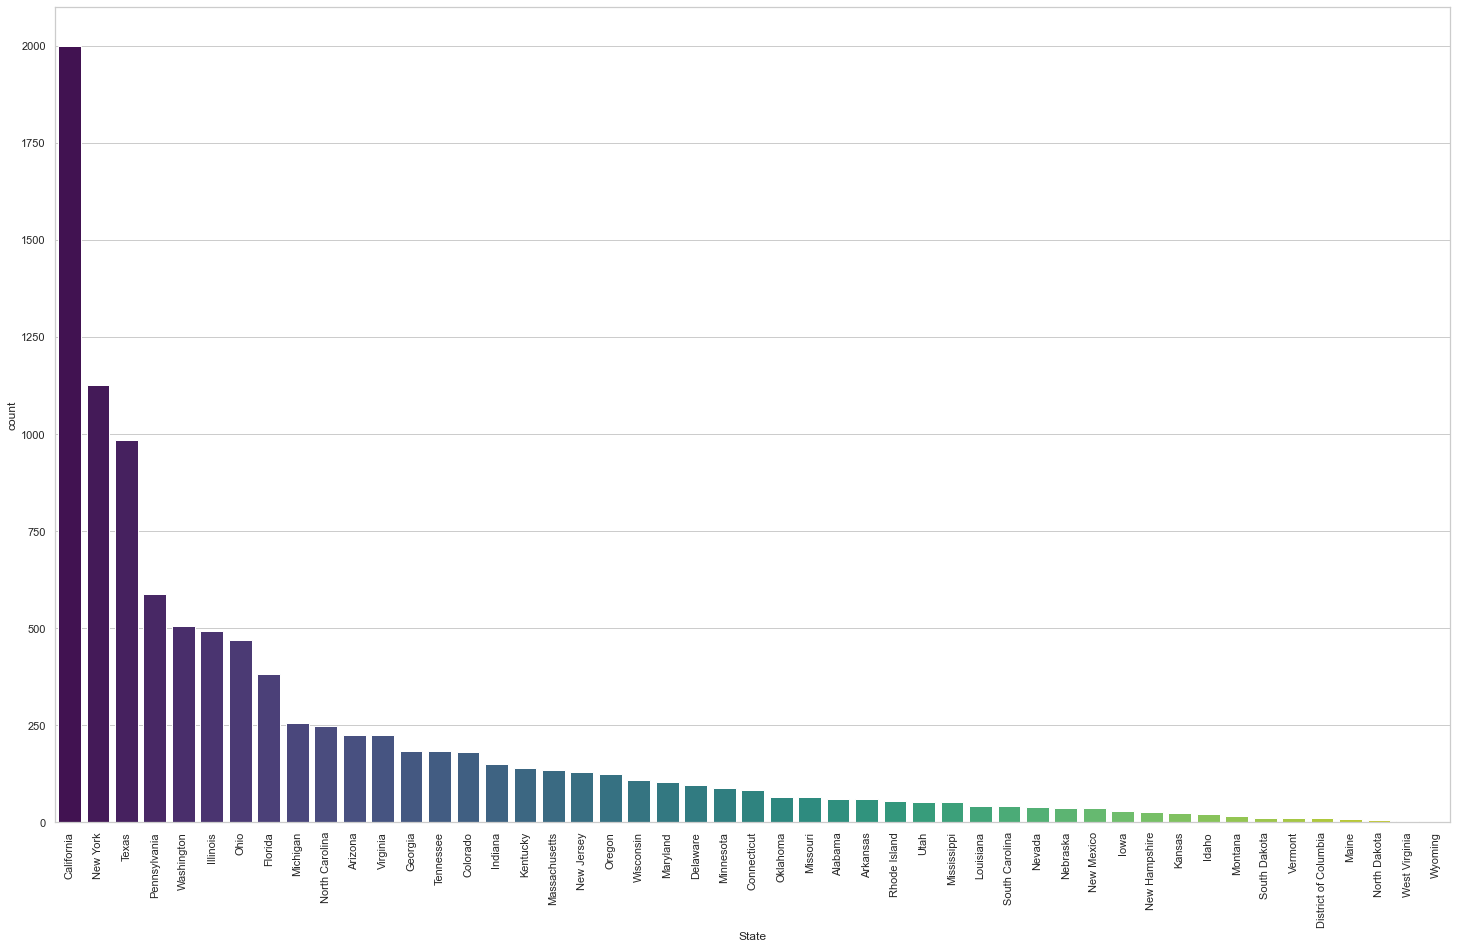

In [378]:
plt.figure(figsize=(25,15))
sns.countplot(x='State',data=data,palette='viridis',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [350]:
data['State'].value_counts()
# California max and Wyoming min

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

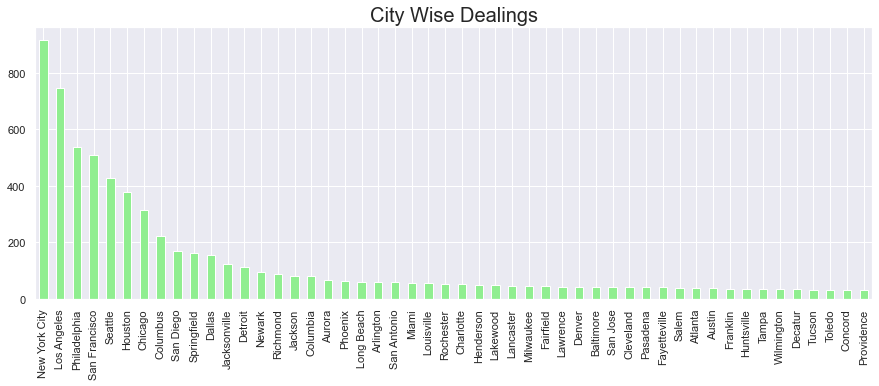

In [351]:
data2 = data['City'].value_counts()
data2=data2.head(50)
data2.plot(kind='bar',figsize=(15,5),color ="lightgreen")
plt.title('City Wise Dealings', fontsize = 20)
plt.show()


In [352]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Commerce City      1
Murrieta           1
Pico Rivera        1
Palatine           1
Danbury            1
Name: City, Length: 531, dtype: int64

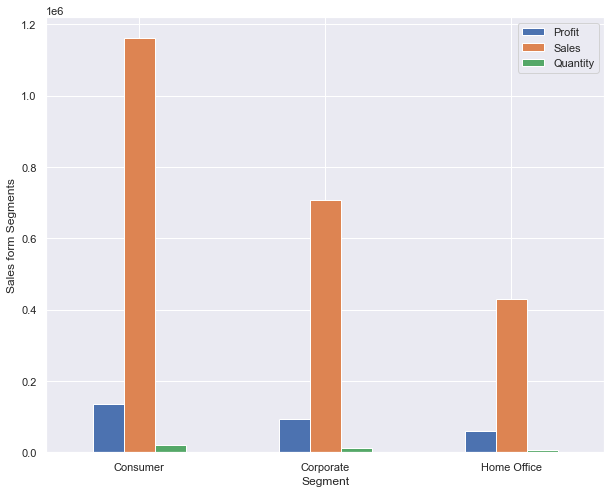

In [353]:
data.groupby('Segment')[['Profit','Sales','Quantity']].sum().plot.bar(figsize=(10,8))
plt.ylabel('Sales form Segments')
plt.xticks(rotation=0)
plt.show()

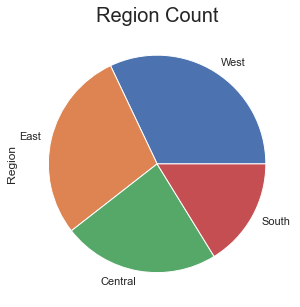

In [354]:
data3 = data['Region'].value_counts()
data3=data3.head(50)

data3.plot(kind='pie',figsize=(15,5))
plt.title('Region Count', fontsize = 20)
plt.show()


In [355]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [356]:
data4 = data['Ship Mode'].value_counts()
data4=data4.head()


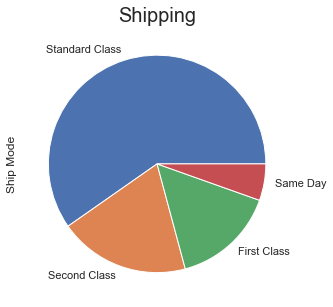

In [357]:
data4.plot(kind='pie',figsize=(15,5))
plt.title('Shipping', fontsize = 20)
plt.show()

In [358]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [359]:
data5 = data['Category'].value_counts()
data5=data5.head()


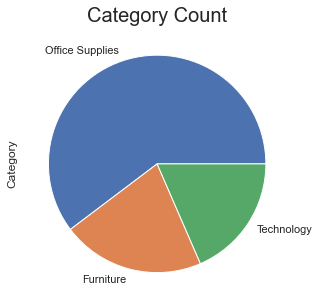

In [360]:
data5.plot(kind='pie',figsize=(15,5))
plt.title('Category Count', fontsize = 20)
plt.show()

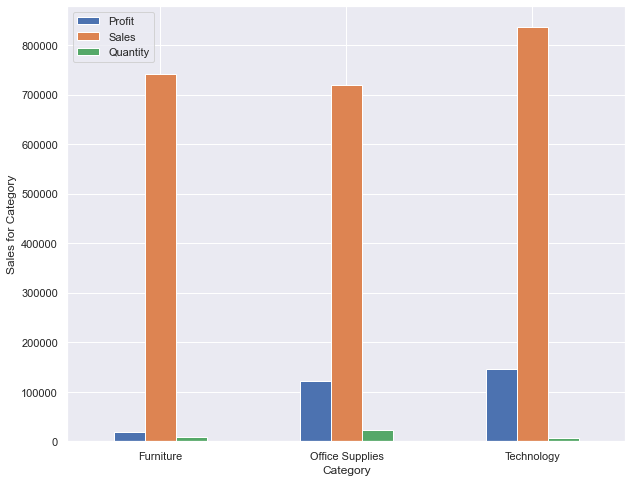

In [361]:
data.groupby('Category')[['Profit','Sales','Quantity']].sum().plot.bar(figsize=(10,8))
plt.ylabel('Sales for Category')
plt.xticks(rotation=0)
plt.show()

In [362]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

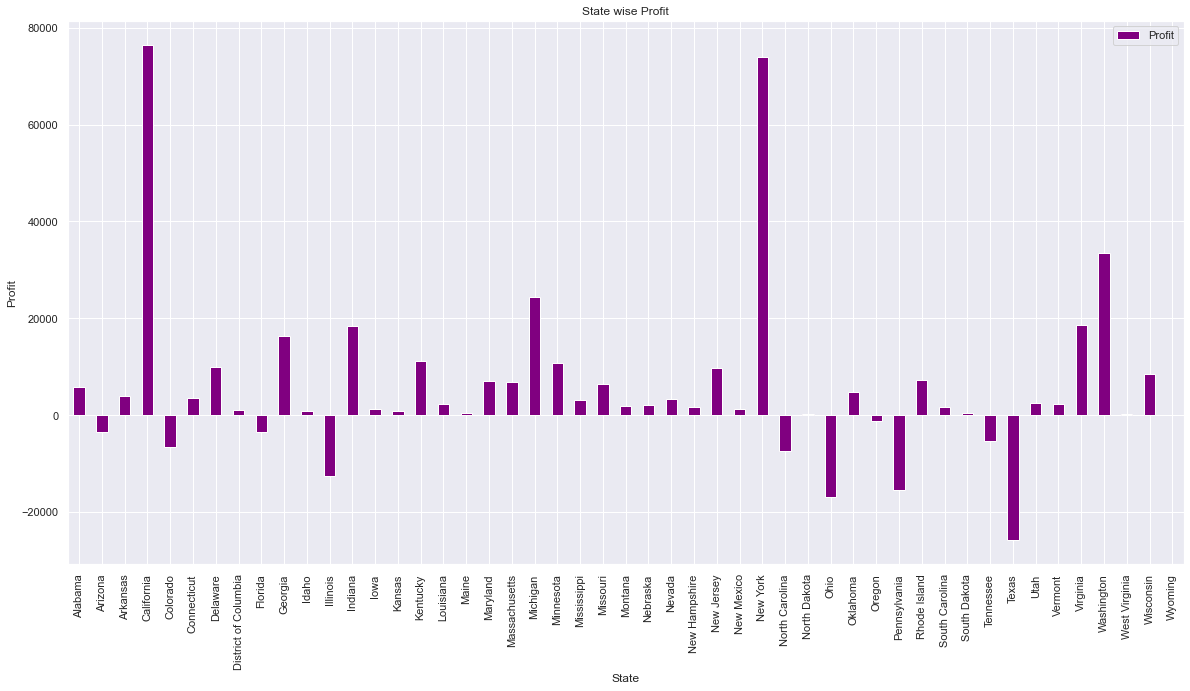

In [363]:
data.groupby('State')[['Profit']].sum().plot.bar(color=["purple"],figsize=(20,10))
plt.ylabel('Profit')
plt.title('State wise Profit')
plt.xticks(rotation=90)
plt.show()

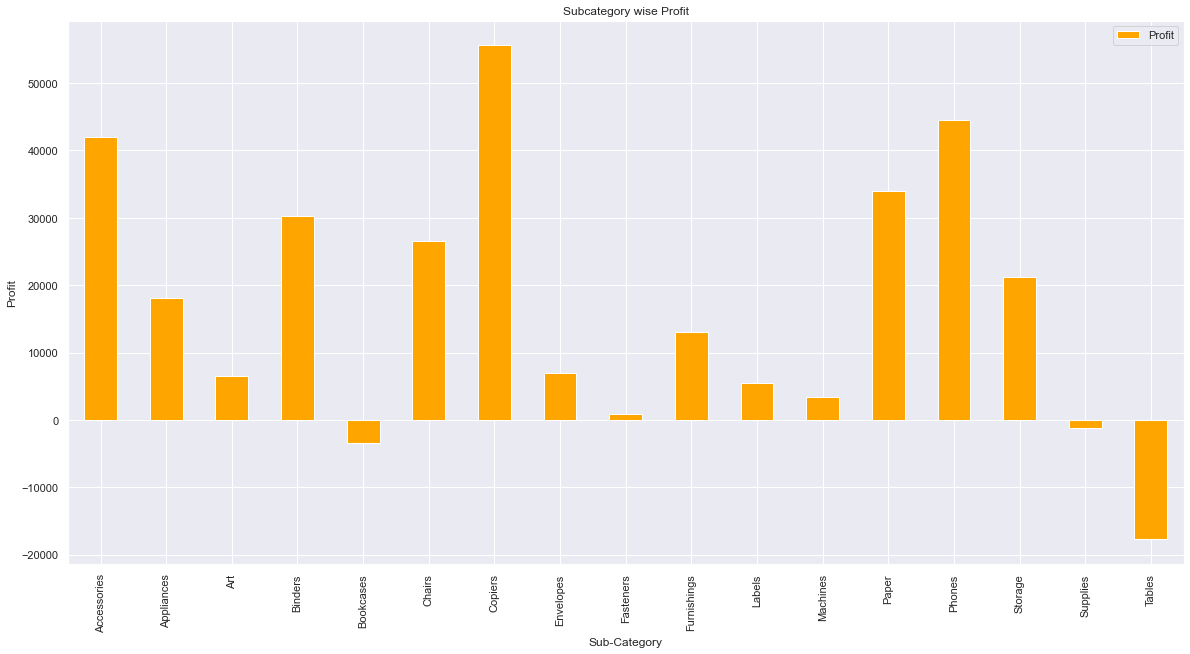

In [364]:
data.groupby('Sub-Category')[['Profit']].sum().plot.bar(color=["orange"],figsize=(20,10))
plt.ylabel('Profit')
plt.title('Subcategory wise Profit')
plt.xticks(rotation=90)
plt.show()


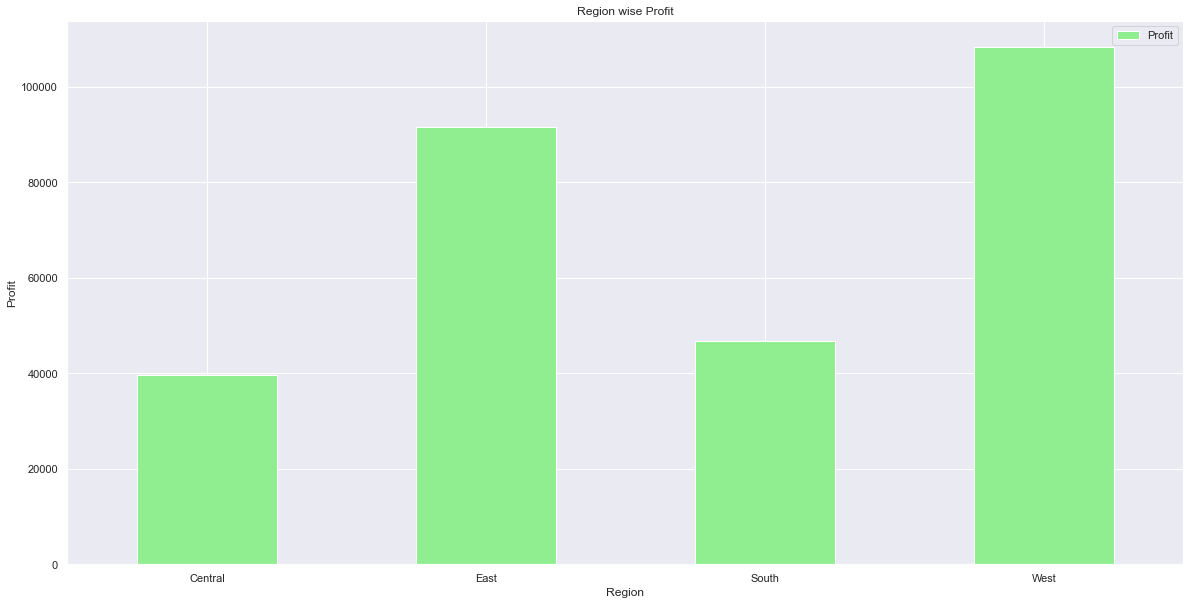

In [365]:
data.groupby('Region')[['Profit']].sum().plot.bar(color=["lightgreen"],figsize=(20,10))
plt.ylabel('Profit')
plt.title('Region wise Profit')
plt.xticks(rotation=0)
plt.show()

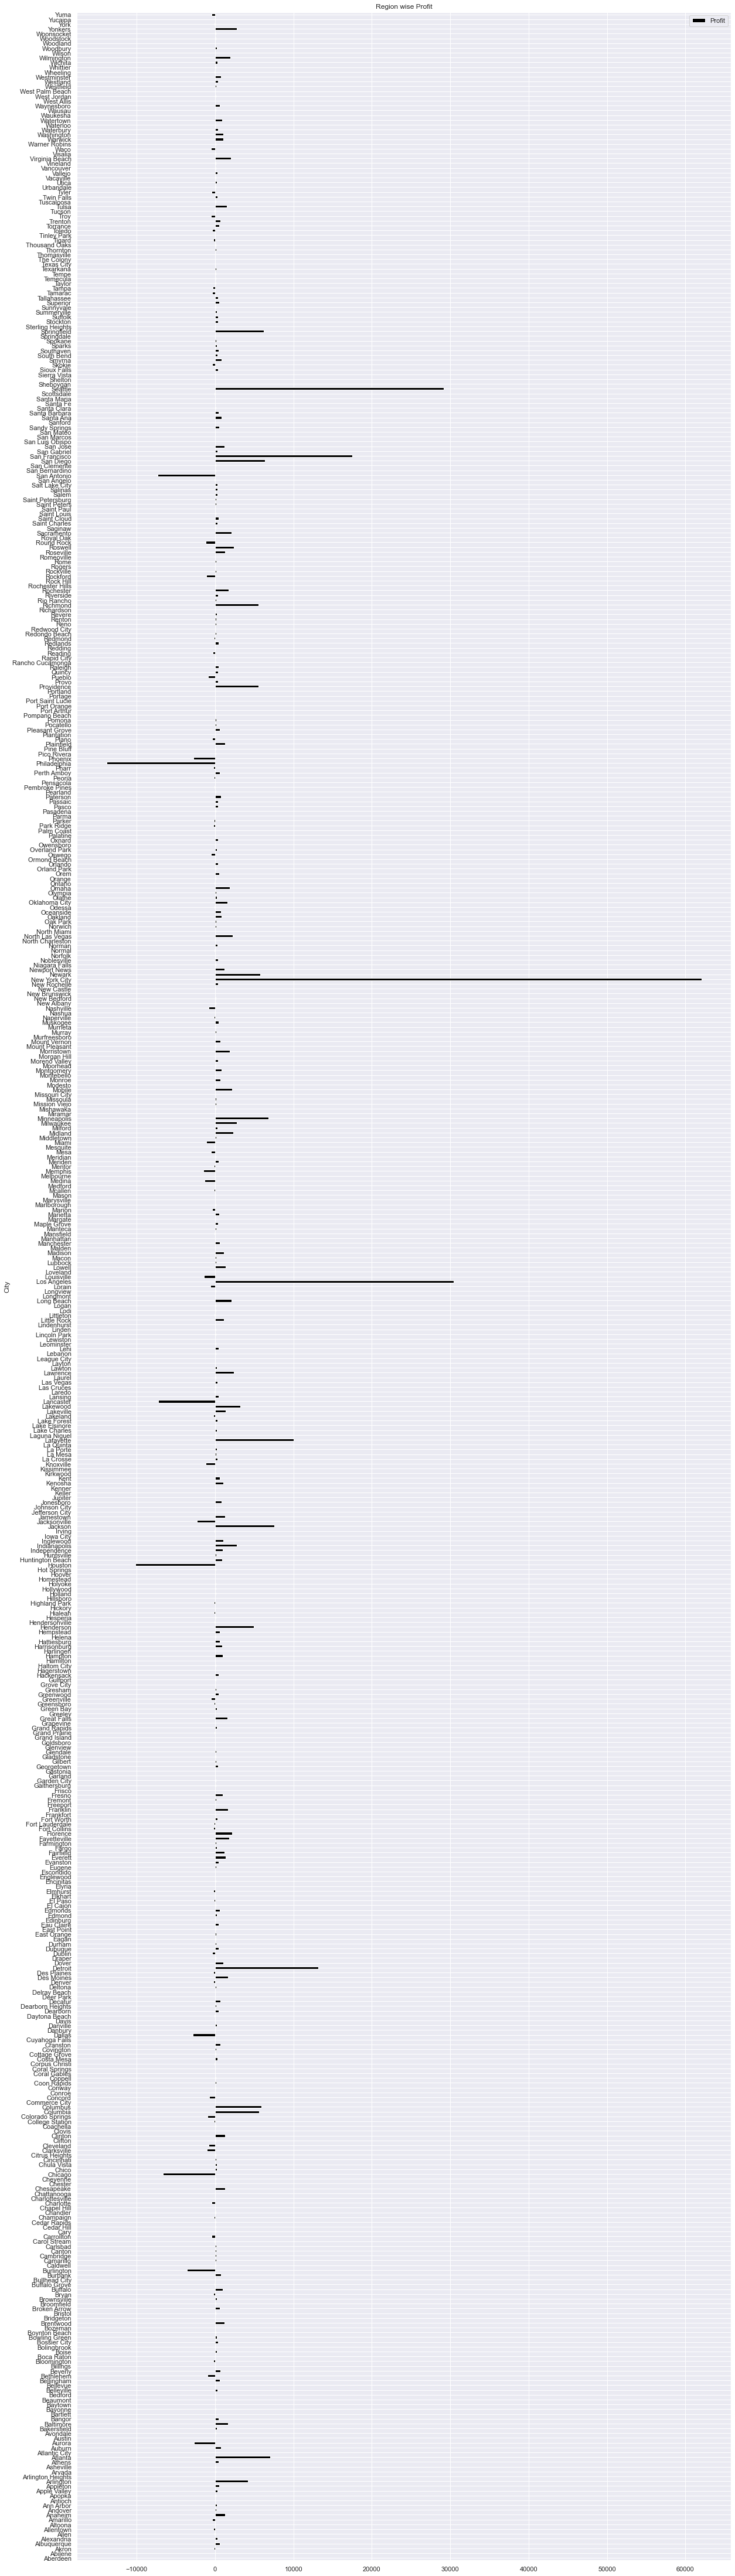

In [366]:
data.groupby('City')[['Profit']].sum().plot.barh(color=["black"],figsize=(20,80))
plt.ylabel('City')
plt.title('Region wise Profit')

plt.show()
#New York most Profitable and Philadelphia is the least Profitable


<Figure size 432x288 with 0 Axes>

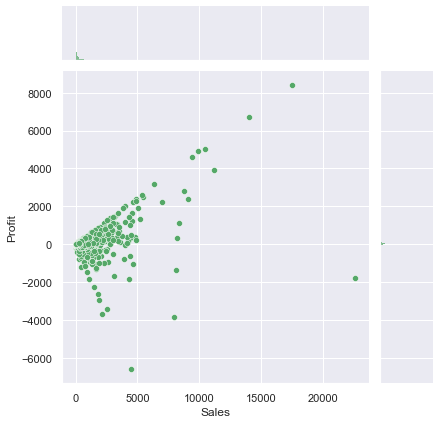

In [367]:

plt.figure()
sns.jointplot('Sales','Profit', data=data,color="g")
plt.show()

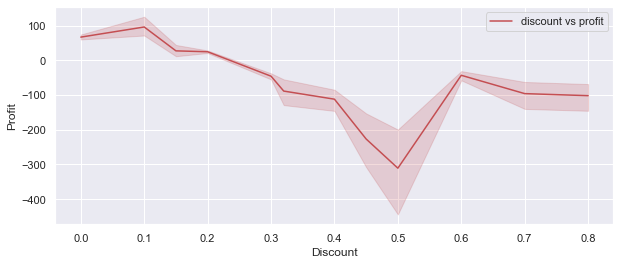

In [368]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data , color='r',label='discount vs profit')
plt.show()

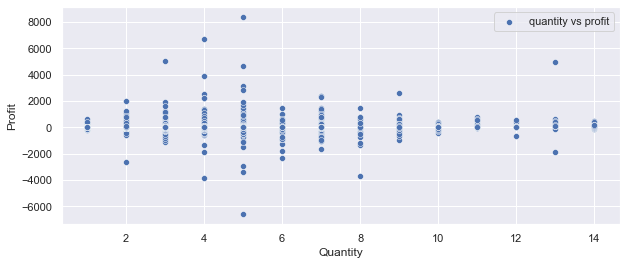

In [369]:
plt.figure(figsize=(10,4))
sns.scatterplot('Quantity','Profit', data=data , color='b',label='quantity vs profit')
plt.show()

<Figure size 432x288 with 0 Axes>

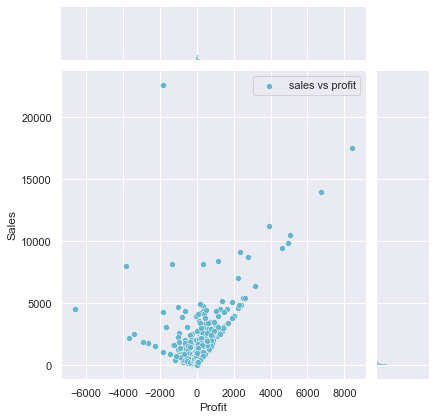

In [370]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.jointplot('Profit','Sales', data=data , color='c',label='sales vs profit')
plt.show()



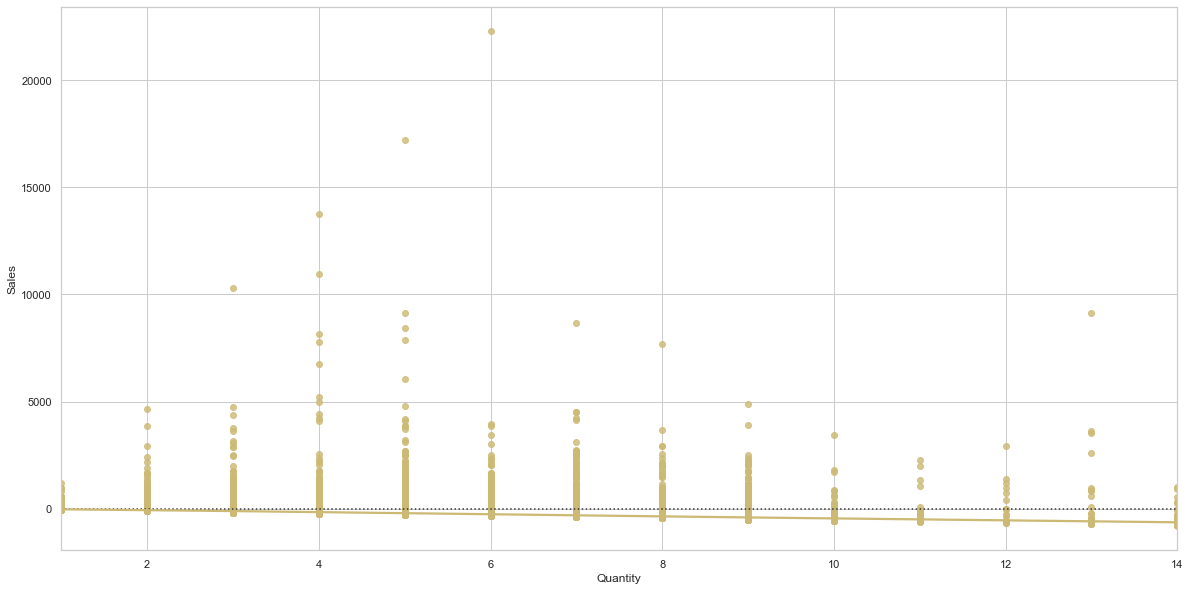

In [371]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.residplot ('Quantity','Sales', data=data ,lowess=True, color='y')
plt.show()

# CONCLUSION
Profit depends upon Quantity And Sales 
# Most Profitable 
State is California 
#

City is NewYork
#

Category is Technology
#

Items are Copiers and Phones
# Observation 
Selling directly to consumer is most profitable Segment 
#

Standard Shipping is commonly used .
#

Also Wyoming and West Virginia have the least sale
# Suggestion 
The Company should focus more on the Western region in terms of Investments
# Least Profitable
States are Texas and Illinos;Items are Tables and Book Cases
